Getting the data from Google Sheets...

Data successfully loaded!

25 answers were loaded.
Columns detected: ['Timestamp', 'E-mail', 'Ambassador Name', 'Activity Date', 'Type of Report', 'New member name', 'New member number', 'Evidence of Member-Get-A-Member upload', 'Name of Local Group Formed', 'Link of the local group no VTools', 'vTools Event Link', 'Date of Coffee Talk', 'Title/Topic of Coffee Talk', 'Number of Participants in this Session', 'Evidence of the Number of Participants', 'Evidence of event promotion', 'Validated']

--- CALCULATING SCORES ---

Counting 11 validated entries out of 25 total entries.

--- AMBASSADORS STANDINGS TABLE ---
               Recruiting  Local_Groups  Meetings  Participants  \
Ana Silva              40            15         6            15   
Carlos Lima            10             0         3            12   
Beatriz Costa           0             0         0             0   
David Santos            0             0         0             0   
Elena 

<ipython-input-2-f84163237868>:140: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  scores_df = pd.DataFrame(index=ambassadors_list, columns=scoring_columns).fillna(0)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Chart 'ambassador_scores_chart.png' ready to download.


<Figure size 1200x600 with 0 Axes>

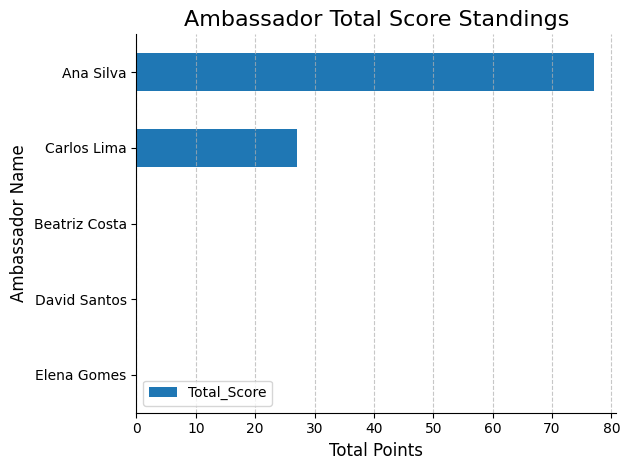


--- Visualization completed ---


In [2]:
#Author: Juan Fernando Galindo Jaramillo. jgalindoj@ieee.org

import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt

COL_AMBASSADOR_NAME = 'Ambassador Name'
COL_TYPE_OF_REPORT = 'Type of Report'
COL_COFFEE_TALK_PARTICIPANTS = 'Number of Participants in this Session'
COL_VALIDATED = 'Validated' # Make sure this matches your new column name

TYPE_RECRUITED_MEMBER = "Recruited New IEEE Member(s)"
TYPE_LOCAL_GROUP = "Local Group Formed"
TYPE_MEETING_COFFEE_TALK = "Meeting/Coffee Talk Held (Reported in vTools)"
TYPE_EVENT_PROMOTION = "Event Promotion"

# Option 1: Upload a file (CSV or Excel)to Colab
#-------------------------------------------------------------------
# Uncomment the lines below for using this option

# print("Please upload your CSV or Excel file with your form data.")
# uploaded = files.upload()

# df = None
# if uploaded:
#     file_name = next(iter(uploaded))
#     print(f"\nFile '{file_name}' loaded.")
#     try:
#         if file_name.endswith('.csv'):
#
#             try:
#                 df = pd.read_csv(io.BytesIO(uploaded[file_name]))
#             except pd.errors.ParserError:
#                 try:
#                     print("Error at reading CSV with ',', trying with ';'")
#                     df = pd.read_csv(io.BytesIO(uploaded[file_name]), sep=';')
#                 except Exception as e_sep:
#                     print(f"Error at reading CSV with ';': {e_sep}")
#                     print("Trying with encoding latin1...")
#                     try:
#                         df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='latin1')
#                     except:
#                         df = pd.read_csv(io.BytesIO(uploaded[file_name]), sep=';', encoding='latin1')

#         elif file_name.endswith('.xlsx'):
#             df = pd.read_excel(io.BytesIO(uploaded[file_name]))
#         else:
#             print("Unsupported file data. Please, use CSV ou XLSX.")

#         if df is not None and not df.empty:
#             print("\nData successfully loaded!")
#         elif df is not None and df.empty:
#             print("The file was loaded, but it is empty or cannot be read correctly.")
#         else:
#             print("It was not possible to read the file.")
#     except Exception as e:
#         print(f"Error at processing file: {e}")
#         df = None
# else:
#     print("No file was loaded.")
#     df = None

#-------------------------------------------------------------------

# Option 2: Read from a Public Google Sheets (CSV format)
#-------------------------------------------------------------------
# To use this option:
# 1. Open your Google Sheets file.
# 2. Go to "File" > "Share" > "Publish on the web".
# 3. Choose the page you want to use.
# 4. Select "Comma separated values (.csv)" as format.
# 5. Clic on "Publish".
# 6. Copy the generated link.
# OR
# 1. Clic on "Share".
# 2. In "General access", change to "Anyone with the link".
# 3. Define the role as "Reader".
# 4. Copy the sheet link (ex: https://docs.google.com/spreadsheets/d/SEU_SHEET_ID/edit?usp=sharing)
# 5. Build the CSV link: change '/edit?usp=sharing' with '/export?format=csv&gid=SEU_GID'
#    (GID is usually 0 for the first page. You can find the GID number at the sheet URL when the page is selected, like &gid=xxxxxx)

# Uncomment the lines below and replace the example CSV link with your public CSV link.
# CSV link: 'https://docs.google.com/spreadsheets/d/SEU_SHEET_ID/export?format=csv&gid=SEU_GID'

print("Getting the data from Google Sheets...")
public_sheet_url = "https://docs.google.com/spreadsheets/d/1LoeUQtTKKqp6Q9pOt05xs7QA931E2fHVKimXscsnSDU/export?format=csv&gid=0"
try:
    df = pd.read_csv(public_sheet_url)
    if not df.empty:
        print("\nData successfully loaded!")
    else:
        print("The file was loaded, but it is empty or cannot be read correctly.")
except Exception as e:
    print(f"Error when loading data from the link: {e}")
    print("Check if the link is correct and if the sheet is pubisched correctly as CSV or accessible for 'anyone with the link'.")
    df = None

#-------------------------------------------------------------------

# --- DATAFRAME VERIFICATION---
if df is None or df.empty:
    print("\nERRO: DataFrame was not loaded or is empty. Check Option 1 or 2 and try again.")
    # exit()
else:
    print(f"\n{len(df)} answers were loaded.")

    print("Columns detected:", df.columns.tolist())

    # --- Data cleaning and preprocessing ---
    if COL_AMBASSADOR_NAME not in df.columns:
        print(f"CRITICAL ERROR: The column '{COL_AMBASSADOR_NAME}' was not found. Check the name in your file/sheet.")
        # exit()
    elif COL_TYPE_OF_REPORT not in df.columns:
        print(f"CRITICAL ERROR: The column '{COL_TYPE_OF_REPORT}' was not found. Check the name in your file/sheet.")
        # exit()
    elif COL_VALIDATED not in df.columns:
        print(f"AVISO: The validation column '{COL_VALIDATED}' was not found. All entries will be counted.")
        df[COL_VALIDATED] = 'TRUE' # Treat all as validated if column is missing
    else:
        if COL_COFFEE_TALK_PARTICIPANTS in df.columns:
            df[COL_COFFEE_TALK_PARTICIPANTS] = pd.to_numeric(df[COL_COFFEE_TALK_PARTICIPANTS], errors='coerce').fillna(0)
        else:
            print(f"WARNING: The column '{COL_COFFEE_TALK_PARTICIPANTS}' was not found. Total score becaus of the number of participants will be 0.")
            df[COL_COFFEE_TALK_PARTICIPANTS] = 0

        # --- Score Calculation ---
        print("\n--- CALCULATING SCORES ---")

        ambassadors_list = df[COL_AMBASSADOR_NAME].dropna().unique()
        scoring_columns = [
            'Recruiting', # Nomes abreviados para melhor visualização
            'Local_Groups',
            'Meetings',
            'Participants',
            'Events_Promotion',
            'Total_Score'
        ]
        scores_df = pd.DataFrame(index=ambassadors_list, columns=scoring_columns).fillna(0)

        df_validated = df[df[COL_VALIDATED].astype(str).str.upper() == 'TRUE'].copy()
        print(f"\nCounting {len(df_validated)} validated entries out of {len(df)} total entries.")

        for ambassador in ambassadors_list:
            # Use the df_validated for ambassador-specific calculations
            df_ambassador = df_validated[df_validated[COL_AMBASSADOR_NAME] == ambassador]

            # 1. Recruited members score

            if COL_TYPE_OF_REPORT in df_ambassador.columns:
                num_members_recruited = len(df_ambassador[df_ambassador[COL_TYPE_OF_REPORT] == TYPE_RECRUITED_MEMBER])
                if num_members_recruited == 1:
                    scores_df.loc[ambassador, 'Recruiting'] = 10
                elif num_members_recruited == 2:
                    scores_df.loc[ambassador, 'Recruiting'] = 25
                elif num_members_recruited >= 3:
                    scores_df.loc[ambassador, 'Recruiting'] = 40
                else:
                    scores_df.loc[ambassador, 'Recruiting'] = 0
            else:
                scores_df.loc[ambassador, 'Recruiting'] = 0


            # 2. Local groups scores
            if COL_TYPE_OF_REPORT in df_ambassador.columns:
                num_local_groups = len(df_ambassador[df_ambassador[COL_TYPE_OF_REPORT] == TYPE_LOCAL_GROUP])
                scores_df.loc[ambassador, 'Local_Groups'] = num_local_groups * 15
            else:
                scores_df.loc[ambassador, 'Local_Groups'] = 0

            # 3. Meetings scores
            if COL_TYPE_OF_REPORT in df_ambassador.columns:
                num_meetings = len(df_ambassador[df_ambassador[COL_TYPE_OF_REPORT] == TYPE_MEETING_COFFEE_TALK])
                scores_df.loc[ambassador, 'Meetings'] = num_meetings * 3
            else:
                scores_df.loc[ambassador, 'Meetings'] = 0

            # 4. Participants in Meetings Scores
            if COL_TYPE_OF_REPORT in df_ambassador.columns and COL_COFFEE_TALK_PARTICIPANTS in df_ambassador.columns:
                df_meetings_ambassador = df_ambassador[df_ambassador[COL_TYPE_OF_REPORT] == TYPE_MEETING_COFFEE_TALK]
                total_participants = df_meetings_ambassador[COL_COFFEE_TALK_PARTICIPANTS].sum()
                scores_df.loc[ambassador, 'Participants'] = total_participants * 1
            else:
                scores_df.loc[ambassador, 'Participants'] = 0


            # 5. Events promotions Scores
            if COL_TYPE_OF_REPORT in df_ambassador.columns:
                num_event_promotions = len(df_ambassador[df_ambassador[COL_TYPE_OF_REPORT] == TYPE_EVENT_PROMOTION])
                scores_df.loc[ambassador, 'Events_Promotion'] = num_event_promotions * 1
            else:
                scores_df.loc[ambassador, 'Events_Promotion'] = 0


        # Total_Score Calculation
        scores_df['Total_Score'] = scores_df.sum(axis=1)

        # Descendent Standings
        scores_df = scores_df.sort_values(by='Total_Score', ascending=False)

        print("\n--- AMBASSADORS STANDINGS TABLE ---")
        print(scores_df)

        # --- Download results as CSV
        # Uncomment the lines below to download scores.
        #
        # from google.colab import files
        # results_filename = 'ambassadors_scores.csv'
        # scores_df.reset_index().rename(columns={'index': COL_AMBASSADOR_NAME}).to_csv(results_filename, index=False, encoding='utf-8-sig')
        # files.download(results_filename)
        # print(f"\nFile '{results_filename}' ready to download.")

        print("\n--- VISUALIZING AMBASSADOR TOTAL SCORES ---")

        # Dynamically adjust figure height based on number of ambassadors
        # This prevents labels from overlapping for many ambassadors
        num_ambassadors = len(scores_df)
        # Ensure a minimum height for readability, then add space per ambassador
        fig_height = max(6, num_ambassadors * 0.4)

        plt.figure(figsize=(12, fig_height)) # Width 12 inches, dynamic height

        # Plotting the horizontal bar chart, explicitly plotting only 'Total_Score'
        # The 'y' parameter specifies which column to plot as the bar lengths [1]
        ax = scores_df.plot.barh(y='Total_Score', color='#1f77b4') # A standard blue color [1]

        # Customizing the plot for clarity
        plt.title('Ambassador Total Score Standings', fontsize=16)
        plt.xlabel('Total Points', fontsize=12)
        plt.ylabel('Ambassador Name', fontsize=12)

        # Invert y-axis to have the highest score at the top, consistent with leaderboard view
        ax.invert_yaxis()

        # Remove top and right spines for a cleaner look
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # Add a grid for easier reading of values on the x-axis
        ax.grid(axis='x', linestyle='--', alpha=0.7)

        plt.tight_layout() # Adjust layout to prevent labels from overlapping

        # Option to download the plot as a PNG image
        # chart_filename = 'ambassador_scores_chart.png'
        # plt.savefig(chart_filename, bbox_inches='tight', dpi=300) # Save with tight bounding box and 300 DPI
        # files.download(chart_filename) # Trigger download in Colab
        # print(f"\nChart '{chart_filename}' ready to download.")

        plt.show() # Display the plot after saving

        print("\n--- Visualization completed ---")